# Problem Statement
## Overview:
In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

## Deliverables:
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

## Data Source
The dataset you will use comes from the UCI Machine Learning repository. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns.The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from tqdm import tqdm
from time import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data into a Pandas Dataframe.
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Checking for NULL Values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Feature Exploration

After initial exploration, we can see that there a total of 21 features present in the data. Each of the features are explained below with some short description

### Input variables:

#### Bank Client Data:

- age: Age of the client (numeric)
- job : Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')



In [7]:
# Printing all unique values for all categorical attributes
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())


job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

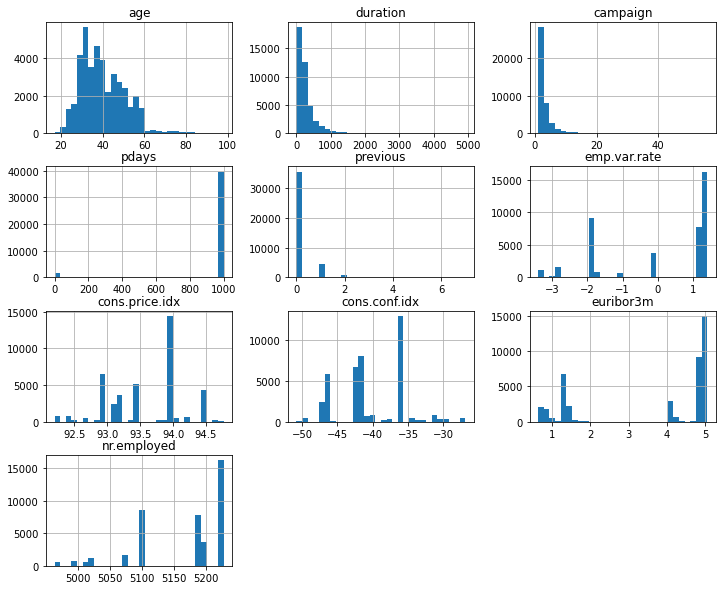

In [8]:
# Histogram Plots of numerical attribtues
df.hist(bins=30, figsize=(12, 10))

## Visualizations / Graphs

Text(0.5, 1.0, 'Age Count Distribution by number of client subscribed')

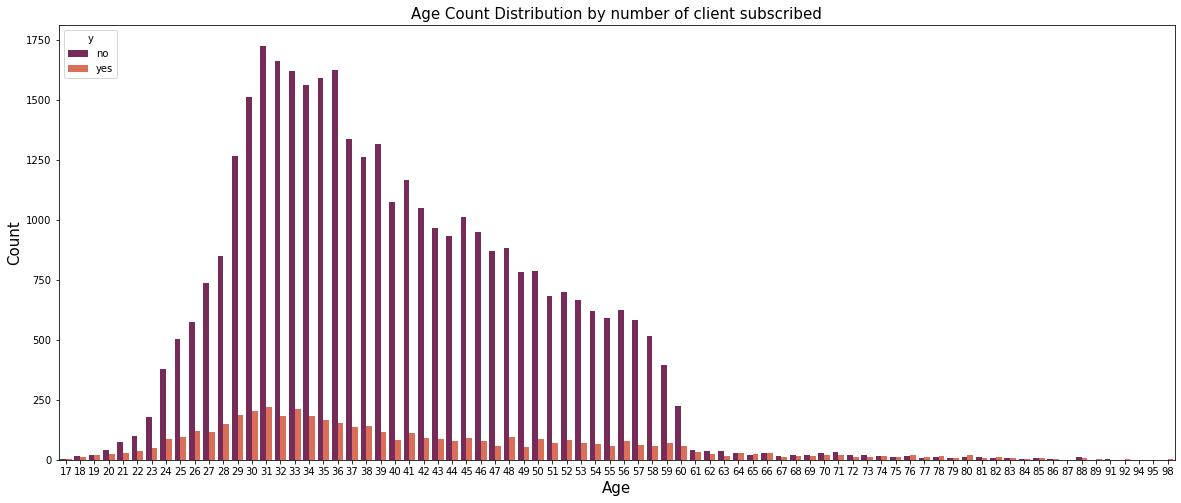

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df, palette='rocket', hue='y')
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution by number of client subscribed', fontsize=15)


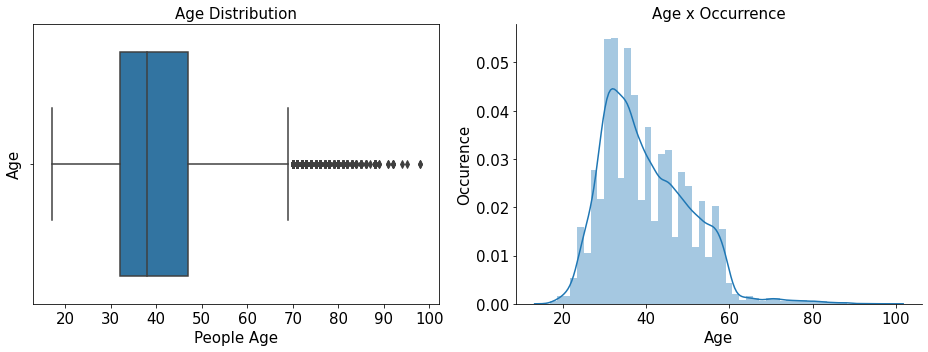

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'services'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

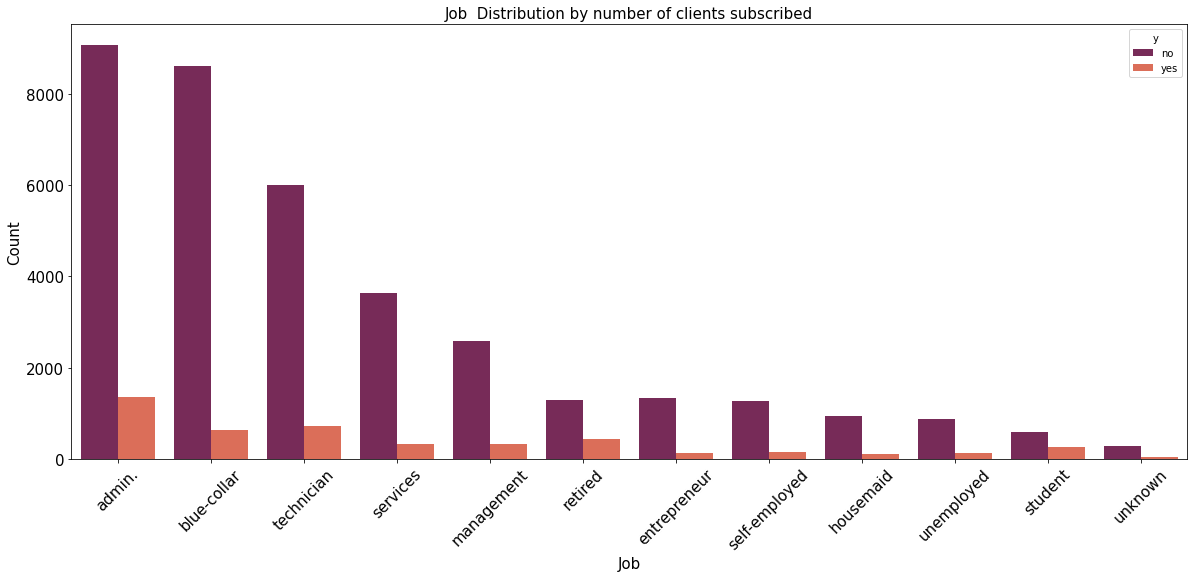

In [17]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df, palette='rocket', order=df['job'].value_counts().index, hue='y')
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job  Distribution by number of clients subscribed', fontsize=15)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45)

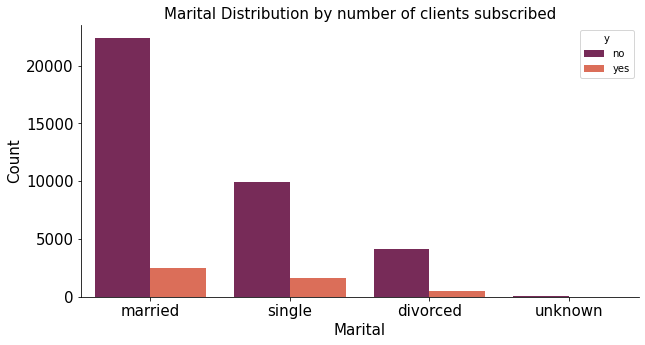

In [19]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df,palette='rocket', hue='y')
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Distribution by number of clients subscribed', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

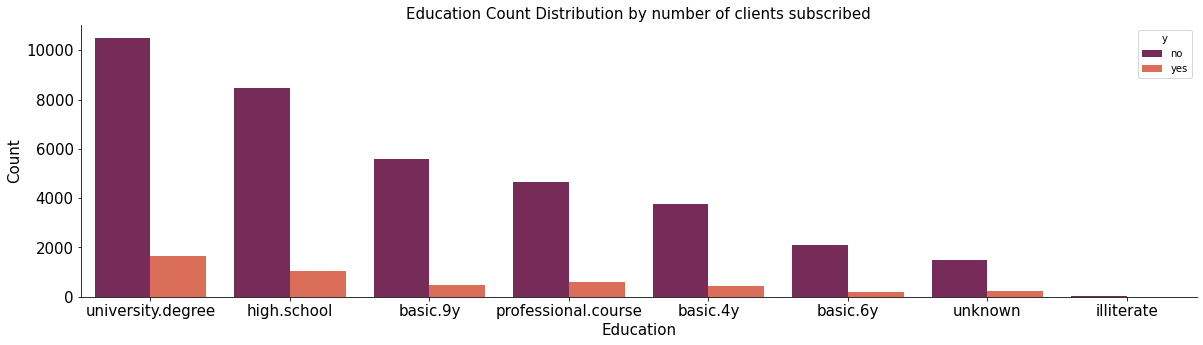

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = df,palette='rocket', order=df['education'].value_counts().index,hue='y' )
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution by number of clients subscribed', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [22]:
 df_cleaned = df.copy()

In [23]:
# Remove outliers from the Numerical Column - Age using IQR
first_quartile = df['age'].quantile(.25)
third_quartile = df['age'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
df_cleaned = df.loc[(df['age']>lower) & (df['age']<upper)]

# Remove outliers from the Numerical Column - Duration using IQR
first_quartile = df_cleaned['duration'].quantile(.25)
third_quartile = df_cleaned['duration'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
df_cleaned = df_cleaned.loc[(df_cleaned['duration']>lower) & (df_cleaned['duration']<upper)]

# Remove outliers from the Numerical Column - Campaign  using IQR
first_quartile = df_cleaned['campaign'].quantile(.25)
third_quartile = df_cleaned['campaign'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
df_cleaned = df_cleaned.loc[(df_cleaned['campaign']>lower) & (df_cleaned['campaign']<upper)]

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

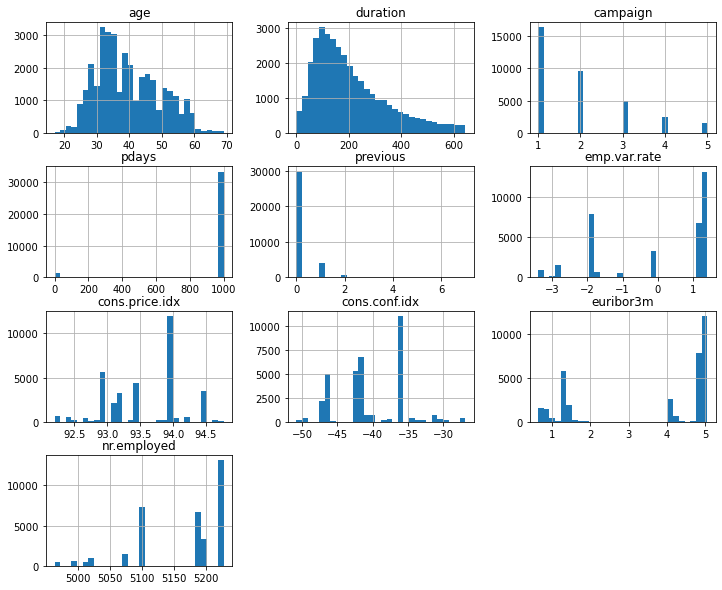

In [24]:
# Distribution graphs of the data with reduced outliers
df_cleaned.hist(bins=30, figsize=(12, 10))

In [25]:
df_cleaned.shape

(34634, 21)

## Scaling and Feature Engineering

In [30]:
# Defining numerical and categorical variables
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

In [31]:

#Converting Categorical Columns to Numerical Columns using Target Encoder
encoder_df = df_cleaned.copy()
encoder = preprocessing.LabelEncoder()
encoder_df = encoder_df.drop('duration', axis=1)
def target_encoder(data):
    impute_ordinal = encoder.fit_transform(data)
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

for i in tqdm(range(len(cat_cols))):
    target_encoder(encoder_df[cat_cols[i]])
encoder_df.reset_index()

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 115.72it/s]


,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,3,1,0,0,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,57,7,1,3,1,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,37,7,1,3,0,2,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,40,0,1,1,0,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,4,56,7,1,3,0,0,2,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34629,41181,37,0,1,6,0,2,0,0,7,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
34630,41182,29,10,2,0,0,2,0,0,7,...,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
34631,41184,46,1,1,5,0,0,0,0,7,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
34632,41185,56,5,1,6,0,2,0,0,7,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [32]:
#Standardizing the dataset
scaler = preprocessing.StandardScaler()
std_df = scaler.fit_transform(encoder_df.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','campaign',
                                               'previous','poutcome','emp.var.rate','y'], axis=1))

In [33]:
scaled_df = pd.DataFrame(std_df, columns = ['age','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])

In [37]:
scaled_df['job'] = encoder_df['job'].values
scaled_df['marital'] = encoder_df['marital'].values
scaled_df['education'] = encoder_df['education'].values
scaled_df['default'] = encoder_df['default'].values
scaled_df['housing'] = encoder_df['housing'].values
scaled_df['loan'] = encoder_df['loan'].values
scaled_df['contact'] = encoder_df['contact'].values
scaled_df['month'] = encoder_df['month'].values
scaled_df['day_of_week'] = encoder_df['day_of_week'].values
scaled_df['campaign'] = encoder_df['campaign'].values
scaled_df['previous'] = encoder_df['previous'].values
scaled_df['poutcome'] = encoder_df['poutcome'].values
scaled_df['emp.var.rate'] = encoder_df['emp.var.rate'].values
scaled_df['y'] = encoder_df['y'].values

## Train-Test Split

In [38]:
X = scaled_df.drop('y', axis=1)
y = scaled_df['y'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)

In [39]:
models = ['Logistic Regression','SVM', 'Decision Tree','Random Forest','KNN']
train_time = []
train_accuracy = []
test_accuracy = []
accuracy_score = []
AUC_score = []

## Model

### Logistic Regression


In [40]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=78)
start_time = time()
logistic_regression.fit(X_train, y_train)
train_time.append(time() - start_time)
y_pred = logistic_regression.predict(X_test)

In [42]:
train_accuracy.append(logistic_regression.score(X_train, y_train))
test_accuracy.append(logistic_regression.score(X_test, y_test))
accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
AUC_score.append(metrics.auc(fpr, tpr))

Text(0.5, 1.0, 'Logistic Regression')

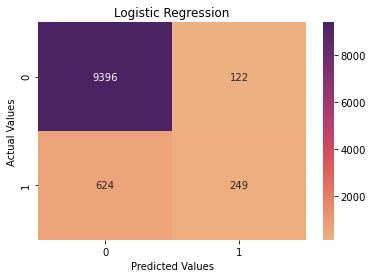

In [43]:
cm_plot = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='flare', fmt='d')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
plt.title("Logistic Regression")

### Model Comparisons 

In [44]:
from pandas.core.common import random_state
model_pipeline = []
model_pipeline.append(SVC(random_state=78))
model_pipeline.append(DecisionTreeClassifier(random_state=78))
model_pipeline.append(RandomForestClassifier(random_state=78))
model_pipeline.append(KNeighborsClassifier())
cm_results = []
for model in model_pipeline:
    start_time = time()
    model.fit(X_train, y_train)
    train_time.append(time() - start_time)
    y_pred = model.predict(X_test)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    AUC_score.append(metrics.auc(fpr, tpr))
    cm_results.append(confusion_matrix(y_test, y_pred))

In [47]:
cm_results

[array([[9415,  103],
        [ 643,  230]], dtype=int64),
 array([[8943,  575],
        [ 520,  353]], dtype=int64),
 array([[9285,  233],
        [ 521,  352]], dtype=int64),
 array([[9252,  266],
        [ 559,  314]], dtype=int64)]

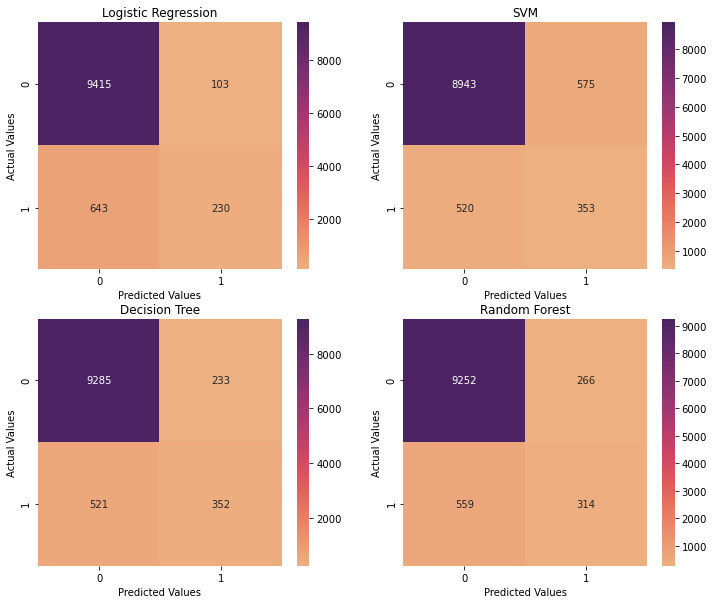

In [107]:
fig = plt.figure(figsize=(12, 10))
for i in range(len(cm_results)):
    cm = cm_results[i]
    model = models[i]
    sub = fig.add_subplot(2, 2, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap='flare', fmt='d')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

### Initial Results of Basic Models


In [108]:
results_df = ''

results_df = pd.DataFrame({'Model': models, 'Train_Time': train_time, 'Train_Score': train_accuracy, 'Test_Score': test_accuracy, 'Accuracy_Score': accuracy_score, 'AUC': AUC_score})
# len(train_time)

In [109]:
results_df

,Model,Train_Time,Train_Score,Test_Score,Accuracy_Score,AUC
0,Logistic Regression,0.135245,0.930289,0.928207,0.928207,0.636203
1,SVM,7.810724,0.930124,0.928207,0.928207,0.626319
2,Decision Tree,0.079623,0.997649,0.894620,0.894620,0.671970
3,Random Forest,1.482779,0.997649,0.927437,0.927437,0.689364
4,KNN,0.160297,0.941426,0.920604,0.920604,0.665866


### Improving Accuracy of Basic Models


In [110]:
models = ['Logistic Regression Grid','SVM Grid', 'Decision Tree Grid','Random Forest Grid','KNN Grid']

best_params = []
fit_time = []
acc_score = []
recall_score = []
prec_score = []
f1_score = []
r2_score = []
roc_auc_score = []

In [111]:
# Applying Hyperparameter and GridSearchCV - LogisticRegression and Performance Metrics
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1-Lasso l2-Ridge
lgr = LogisticRegression()
lgr_cv=GridSearchCV(lgr, grid, cv=10)
lgr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [112]:
lgr_cv.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [113]:
#Adjust Performance Metrics
lgr2=LogisticRegression(C=0.1, penalty="l2", random_state=42) 
start_time = time()
lgr2.fit(X_train,y_train)
train_time = time() - start_time

In [114]:
y_pred = lgr2.predict(X_test)

In [115]:
print(metrics.confusion_matrix(y_test, y_pred))

[[9402  116]
 [ 629  244]]


In [116]:
best_params.append(lgr_cv.best_params_)
fit_time.append(train_time)
acc_score.append(metrics.accuracy_score(y_test, y_pred))
recall_score.append(metrics.recall_score(y_test, y_pred))
prec_score.append(metrics.precision_score(y_test, y_pred))
f1_score.append(metrics.f1_score(y_test, y_pred))
r2_score.append(metrics.r2_score(y_test, y_pred))
roc_auc_score.append(metrics.roc_auc_score(y_test, y_pred))

Feature: 0, Score: 0.03567
Feature: 1, Score: -0.22860
Feature: 2, Score: 0.37404
Feature: 3, Score: 0.05617
Feature: 4, Score: 0.84506
Feature: 5, Score: -0.92484
Feature: 6, Score: 0.00694
Feature: 7, Score: 0.13003
Feature: 8, Score: 0.06074
Feature: 9, Score: -0.43724
Feature: 10, Score: -0.04451
Feature: 11, Score: -0.04518
Feature: 12, Score: -0.69596
Feature: 13, Score: -0.09443
Feature: 14, Score: 0.08791
Feature: 15, Score: -0.07065
Feature: 16, Score: -0.12716
Feature: 17, Score: 0.40124
Feature: 18, Score: -0.86310


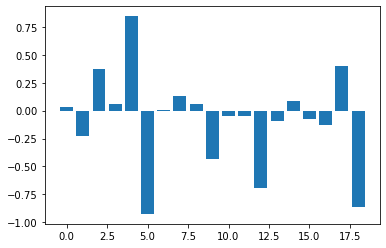

In [117]:
from matplotlib import pyplot 
importance = lgr2.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#Top 3 Feature Importance - euribor3m, poutcome, cons.price.index

In [ ]:
# KNN and GridSearchCV

In [118]:
# Applying Hyperparameter and GridSearchCV - LogisticRegression and Performance Metrics
param_grid = dict(n_neighbors=list(range(1, 22)))
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1)
knn_cv.fit(X_train, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  1.5min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21]},
             scoring='accuracy', verbose=1)

In [119]:
knn_cv.best_params_

{'n_neighbors': 20}

In [120]:
#Adjust Performance Metrics
knn2=KNeighborsClassifier(n_neighbors=18)
start_time = time()
knn2.fit(X_train,y_train)
train_time = time() - start_time

In [121]:
y_pred = knn2.predict(X_test)

In [122]:
print(metrics.confusion_matrix(y_test, y_pred))

[[9380  138]
 [ 635  238]]


In [123]:
best_params.append(knn_cv.best_params_)
fit_time.append(train_time)
acc_score.append(metrics.accuracy_score(y_test, y_pred))
recall_score.append(metrics.recall_score(y_test, y_pred))
prec_score.append(metrics.precision_score(y_test, y_pred))
f1_score.append(metrics.f1_score(y_test, y_pred))
r2_score.append(metrics.r2_score(y_test, y_pred))
roc_auc_score.append(metrics.roc_auc_score(y_test, y_pred))

In [124]:
# Decision Tree and GridSearchCV

In [125]:
params = {'max_depth': [1, 3, 5, 7, 11, 13, 15, 17, 19, 21, 23],
         'min_samples_split': [1, 50, 2],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1]}
dtree = DecisionTreeClassifier()
dtree_cv = GridSearchCV(dtree, params, cv=10)
dtree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 11, 13, 15, 17, 19, 21, 23],
                         'min_samples_leaf': [1],
                         'min_samples_split': [1, 50, 2]})

In [126]:
dtree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 50}

In [127]:
#Adjust Performance Metrics
dtree2=DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=1, min_samples_split=50, random_state=42)
start_time = time()
dtree2.fit(X_train,y_train)
train_time = time() - start_time

In [128]:
y_pred = dtree2.predict(X_test)

In [129]:
print(metrics.confusion_matrix(y_test, y_pred))

[[9369  149]
 [ 618  255]]


In [130]:
best_params.append(dtree_cv.best_params_)
fit_time.append(train_time)
acc_score.append(metrics.accuracy_score(y_test, y_pred))
recall_score.append(metrics.recall_score(y_test, y_pred))
prec_score.append(metrics.precision_score(y_test, y_pred))
f1_score.append(metrics.f1_score(y_test, y_pred))
r2_score.append(metrics.r2_score(y_test, y_pred))
roc_auc_score.append(metrics.roc_auc_score(y_test, y_pred))

Text(0.5, 0, 'X_train Values')

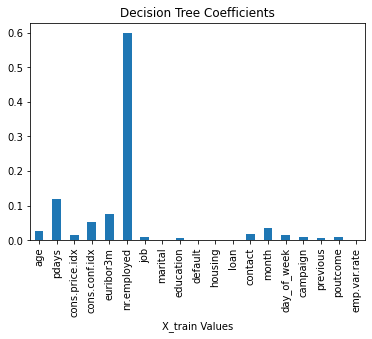

In [131]:
dtree_coeffs = pd.Series(dtree2.feature_importances_, index=X_train.columns)
dtree_coeffs.plot(kind='bar')
plt.title('Decision Tree Coefficients')
plt.xlabel('X_train Values')
#Top 3 Feature Importance - No. of Employees, pdays, euribor3m 

In [132]:
# RandomForest and GridSearchCV

In [133]:
params = {'n_estimators': [1, 3, 5, 7, 11], 
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : [1, 3, 5, 7, 11, 13, 15],
          'criterion' :['gini', 'entropy']}
rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, params, cv=10)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 11]})

In [134]:
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 11}

In [135]:
#Adjust Performance Metrics
rfc2=RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2', n_estimators=11, random_state=42)
start_time = time()
rfc2.fit(X_train,y_train)
train_time = time() - start_time

In [136]:
y_pred = rfc2.predict(X_test)

In [137]:
print(metrics.confusion_matrix(y_test, y_pred))

[[9348  170]
 [ 587  286]]


In [138]:
best_params.append(dtree_cv.best_params_)
fit_time.append(train_time)
acc_score.append(metrics.accuracy_score(y_test, y_pred))
recall_score.append(metrics.recall_score(y_test, y_pred))
prec_score.append(metrics.precision_score(y_test, y_pred))
f1_score.append(metrics.f1_score(y_test, y_pred))
r2_score.append(metrics.r2_score(y_test, y_pred))
roc_auc_score.append(metrics.roc_auc_score(y_test, y_pred))

Text(0.5, 0, 'X_train Values')

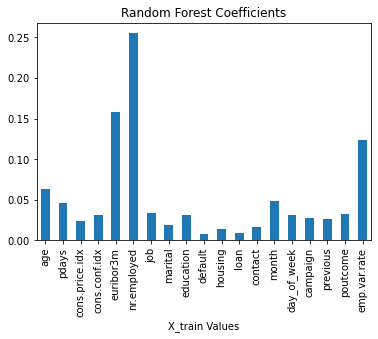

In [139]:
rfc_coeffs = pd.Series(rfc2.feature_importances_, index=X_train.columns)
rfc_coeffs.plot(kind='bar')
plt.title('Random Forest Coefficients')
plt.xlabel('X_train Values')
#Top 3 Feature Importance - No. of Employees, euribor3m , emp.var.rate

In [ ]:
# SVC Grid Search CV

In [140]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0]}
svc = SVC()
svc_cv = GridSearchCV(svc, params, cv=10)
svc_cv.fit(X_train.sample(1000), y_train.sample(1000)) #To save time and computing resource, I applied gridsearch only to 1000 sample data.

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'gamma': [0.1, 1.0, 10.0, 100.0],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [141]:
svc_cv.best_params_

{'gamma': 0.1, 'kernel': 'rbf'}

In [142]:
#Adjust Performance Metrics
svc2=SVC(gamma=0.1, kernel='rbf')
start_time = time()
svc2.fit(X_train,y_train)
train_time = time() - start_time

In [143]:
y_pred = svc2.predict(X_test)

In [144]:
print(metrics.confusion_matrix(y_test, y_pred))

[[9378  140]
 [ 645  228]]


In [145]:
best_params.append(svc_cv.best_params_)
fit_time.append(train_time)
acc_score.append(metrics.accuracy_score(y_test, y_pred))
recall_score.append(metrics.recall_score(y_test, y_pred))
prec_score.append(metrics.precision_score(y_test, y_pred))
f1_score.append(metrics.f1_score(y_test, y_pred))
r2_score.append(metrics.r2_score(y_test, y_pred))
roc_auc_score.append(metrics.roc_auc_score(y_test, y_pred))

In [146]:
# Optimizes Results

In [147]:
results_df1 = ''

In [148]:
results_df1 = pd.DataFrame({'Model': models, 'Best_Params': best_params, 'Train_Time': fit_time, 'Accuracy_Score': acc_score, 'Recall_Score': recall_score, 'Precision_Score': prec_score, 'F1_Score': f1_score, 'R2_Score': r2_score, 'ROC_AUC_Score': roc_auc_score})
results_df1

,Model,Best_Params,Train_Time,Accuracy_Score,Recall_Score,Precision_Score,F1_Score,R2_Score,ROC_AUC_Score
0,Logistic Regression Grid,"{'C': 0.01, 'penalty': 'l2'}",0.163894,0.928303,0.279496,0.677778,0.395783,0.068348,0.633654
1,SVM Grid,{'n_neighbors': 20},0.180872,0.925609,0.272623,0.632979,0.381105,0.033333,0.629062
2,Decision Tree Grid,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.055993,0.926186,0.292096,0.631188,0.399374,0.040836,0.638221
3,Random Forest Grid,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.117813,0.927148,0.327606,0.627193,0.430399,0.053342,0.654873
4,KNN Grid,"{'gamma': 0.1, 'kernel': 'rbf'}",11.157202,0.924454,0.261168,0.619565,0.367446,0.018327,0.623230
